In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression

LinearRegression()

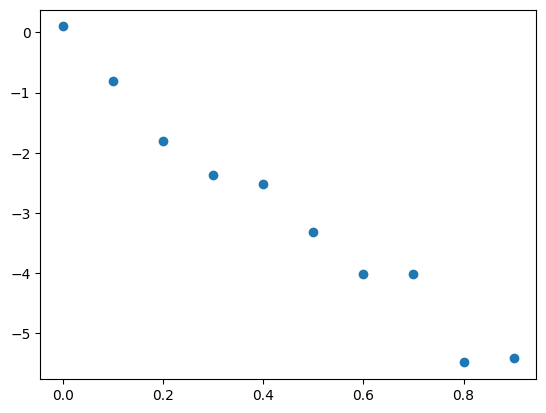

In [ ]:
#Loading Data
X=np.load('x_values.npy')
Y=np.load('y_values.npy')
plt.scatter(X, Y)
LinearRegression().fit(X, Y)

In [ ]:
testX=np.load('test_x_values.npy')
model=LinearRegression()
model.fit(X, Y)
predicted_Y=model.predict(testX)

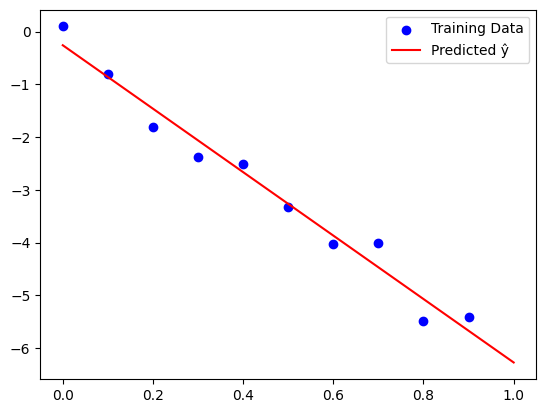

In [ ]:
plt.scatter(X, Y, c='b', label='Training Data', marker='o')
plt.plot(testX, predicted_Y, c='r', label='Predicted ŷ', linestyle='-')
plt.legend()

In [ ]:
x_to_predict = np.array([[0.48]])
predicted_y = model.predict(x_to_predict)
print(predicted_y)

[[-3.14442237]]


### **Task 3.2**

In [ ]:
# Load data
WineData = np.load('wineData.npy')
WineLabels = np.load('wineLabels.npy')

print(WineData.shape)
print(WineLabels.shape)

print(WineData)
print(WineLabels)

In [ ]:
#Splitting Data 80:20
split_point=(int(0.8*WineData.shape[0]))

train_data=WineData[:split_point]
test_data=WineData[split_point:]
train_labels=WineLabels[:split_point]
test_labels=WineLabels[split_point:]

#Verifying the split
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing labels shape:", test_labels.shape)


Training data shape: (142, 13)
Testing data shape: (36, 13)
Training labels shape: (142,)
Testing labels shape: (36,)


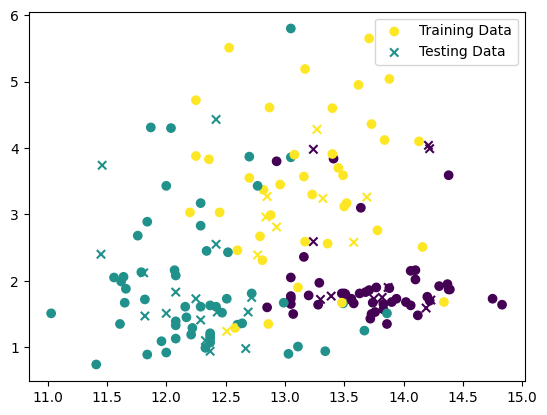

In [ ]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o', label='Training Data')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, marker='x', label='Testing Data')
plt.legend(loc='best')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(train_data)
Two_D_TrainData = pca.transform(train_data)

#Verifying transformed data shape and contents of fitted training data
print(Two_D_TrainData.shape)
print(Two_D_TrainData)

In [ ]:
pca.fit(test_data)
Two_D_TestData = pca.transform(test_data)

#Verifying transformed data shape and contents of fitted testing data
print(Two_D_TestData.shape)
print(Two_D_TestData)

Text(0.5, 1.0, 'Wine Data Reduced-Dimensionality Data with PCA')

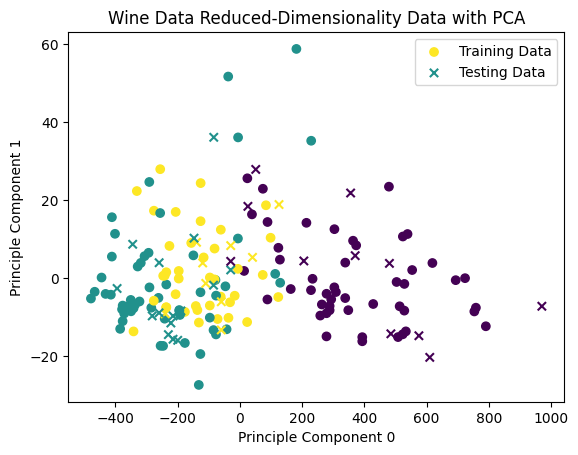

In [ ]:
plt.scatter(Two_D_TrainData[:, 0], Two_D_TrainData[:, 1], c=train_labels, marker='o', label='Training Data')
plt.scatter(Two_D_TestData[:, 0], Two_D_TestData[:, 1], c=test_labels, marker='x', label='Testing Data')
plt.legend(loc='best')
plt.xlabel("Principle Component 0")
plt.ylabel("Principle Component 1")
plt.title("Wine Data Reduced-Dimensionality Data with PCA")

## **Task 3.3**

Text(0.5, 1.0, 'Wine Data Reduced-Dimensionality Data with LDA')

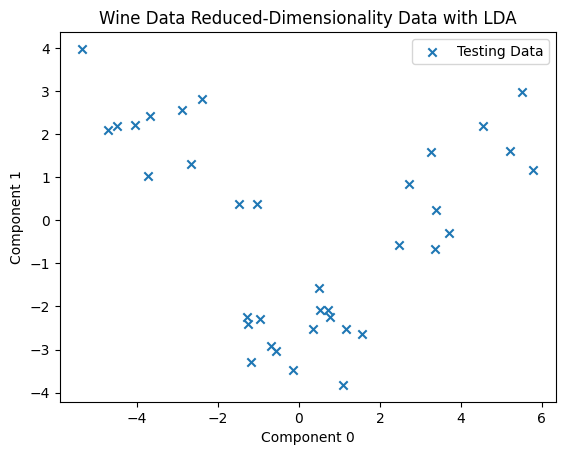

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Defining object and fitting data
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(train_data, train_labels)

# Apply dimensionality reduction transform to the training & testing data
reduced_train_data = lda.transform(train_data)
reduced_test_data = lda.transform(test_data)

#Plotting
#plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1], marker='o', label='Training Data')
plt.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1],  marker='x', label='Testing Data')

# Add labels and legend
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.legend(loc='best')
plt.title("Wine Data Reduced-Dimensionality Data with LDA")


### **Task 3.4**

In [ ]:
#Value of mean of each feature
mean_vector = np.mean(train_data, axis=0)

# Mean-center the training data
mean_centered_train_data = train_data - mean_vector
print(mean_centered_train_data)

#Checking
print(train_data.shape)
print(mean_vector.shape)
print(mean_centered_train_data.shape)

In [ ]:
U, S, Vt = np.linalg.svd(mean_centered_train_data, full_matrices=False)

print(U)
print(S)
print(Vt)

In [ ]:
#Slicing
projection_matrix = Vt[:2]

# Project the mean-centered training data into the PC space
projected_train_data = mean_centered_train_data @ np.transpose(projection_matrix)



-Test data has to be centered with the same mean vector so that all data would follow the same co-ordinate system

-The same transformation needs to be applied to both training and test data so that the reduced data can be compared

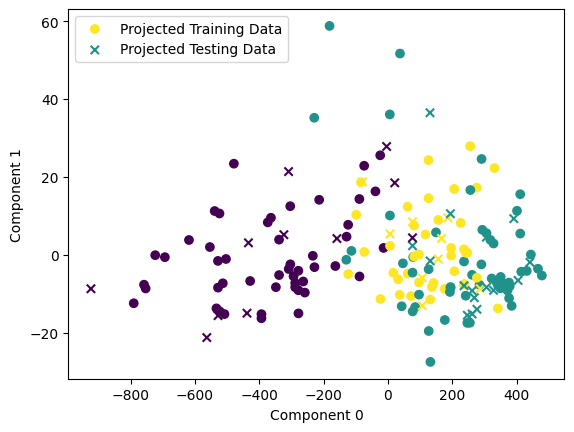

In [ ]:
#Mean centring the test data
mean_centered_test_data = test_data - mean_vector

# Project the mean-centered test data into the same PCA space using the same projection matrix
projected_test_data = mean_centered_test_data @ np.transpose(projection_matrix)


plt.scatter(projected_train_data[:, 0], projected_train_data[:, 1], c=train_labels, marker='o', label='Projected Training Data')
plt.scatter(projected_test_data[:, 0], projected_test_data[:, 1], c=test_labels, marker='x', label='Projected Testing Data')
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.legend(loc='best')



## **Task 3.5**

In [ ]:
pca.fit(Task3_5_DATA)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
min_components = np.argmax(cumulative_variance >= 0.90) + 1

print(min_components)

plt.scatter()


87


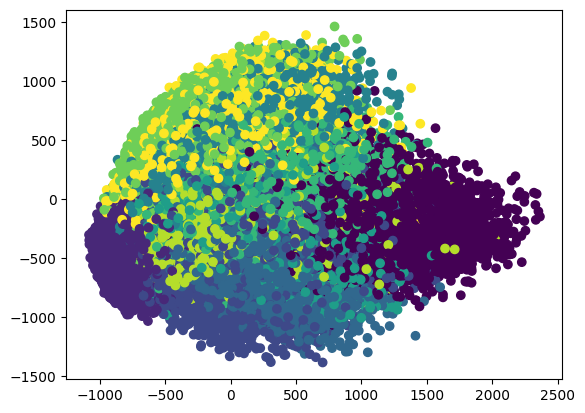

In [ ]:
pca = PCA(min_components)
pca.fit(Task3_5_DATA)
Fitted_Data = pca.transform(Task3_5_DATA)
labelss=np.load('task3_5_labels.npy')



plt.scatter(Fitted_Data[:,0],Fitted_Data[:,1],c=labelss)

## **Task 3.6**

 **1. Why do we not compute a projection matrix and mean value for the testing sets?**

-Test data has to be centered with the same mean vector so that all data would follow the same co-ordinate system

-The same transformation needs to be applied to both training and test data so that the reduced data can be compared

-Testing data has to be independantly tested without being used in any prior calculations


**2. Why does LDA give us nice distinct clusters for our Wine Dataset when PCA does not?**

-PCA focuses on maximising the variance by projecting the data points on the vector in the direction of most variance (First eigen vector of loading matrix)

-LDA focuses on finding the linear combinations of features that maximizes the between-class variance

**3.What benefit does dimensionality reduction provide? What are the drawbacks?**

**Benefits**

-Less expensive to store the data while retaining its meaning, dimensionally reduced data can be visualised using graphs and plot.

**Drawbacks**

-Some information is lost
-The quality of the data reduction depends on the algorithm used and its assumption

**4. How could you use LDA to predict class labels?**

